<a href="https://colab.research.google.com/github/saish15/Machine-Learning/blob/master/IDS_based_on_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"saishur","key":"97c36f52ccb038414d93918c82f58829"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)


In [0]:
import json
token = {"username":"saishur","key":"97c36f52ccb038414d93918c82f58829"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d galaxyh/kdd-cup-1999-data -p /content --force   

 55% 17.0M/30.7M [00:00<00:00, 19.3MB/s]
100% 30.7M/30.7M [00:00<00:00, 37.2MB/s]


In [0]:
!unzip \*.zip

Archive:  kdd-cup-1999-data.zip
  inflating: kddcup.testdata.unlabeled_10_percent.gz  
  inflating: kddcup.newtestdata_10_percent_unlabeled.gz  
  inflating: kddcup.data.gz          
  inflating: corrected.gz            
  inflating: training_attack_types   
  inflating: kddcup.data_10_percent.gz  
  inflating: kddcup.names            
  inflating: kddcup.testdata.unlabeled.gz  
  inflating: typo-correction.txt     


In [0]:
import pandas as pd
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import yellowbrick as yb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [0]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data = pd.read_csv("kddcup.data.gz", header = None, names = col_names)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.00,0.00,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.00,0.00,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.00,0.00,0.0,0.0,1.0,0.0,0.00,5,5,1.0,0.0,0.20,0.00,0.00,0.00,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,6,1.0,0.0,0.17,0.00,0.00,0.00,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,7,7,1.0,0.0,0.14,0.00,0.00,0.00,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.00,0.00,0.0,0.0,1.0,0.0,0.00,8,8,1.0,0.0,0.12,0.00,0.00,0.00,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.


In [0]:
from sklearn.preprocessing import LabelBinarizer

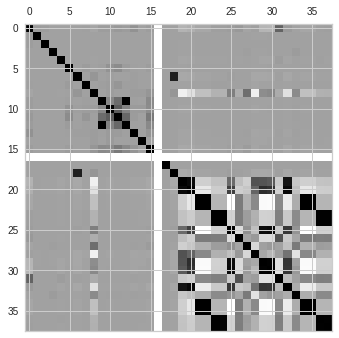

In [0]:
import numpy as np
plt.matshow(data.corr())

In [0]:
len(data.columns)

42

In [0]:

X = data[col_names].as_matrix()
y = data.label.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
y

array(['normal.', 'normal.', 'normal.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object)

In [0]:
import yellowbrick as yb
from yellowbrick.features.rankd import Rank1D, Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
df=data

In [0]:
df.protocol_type = preprocessing.LabelEncoder().fit_transform(df["protocol_type"])
df.service = preprocessing.LabelEncoder().fit_transform(df["service"])
df.flag = preprocessing.LabelEncoder().fit_transform(df["flag"])
df.label = preprocessing.LabelEncoder().fit_transform(df["label"])

In [0]:
X = df[col_names].as_matrix()
y = df.label.as_matrix()
y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([11, 11, 11, ..., 11, 11, 11])

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


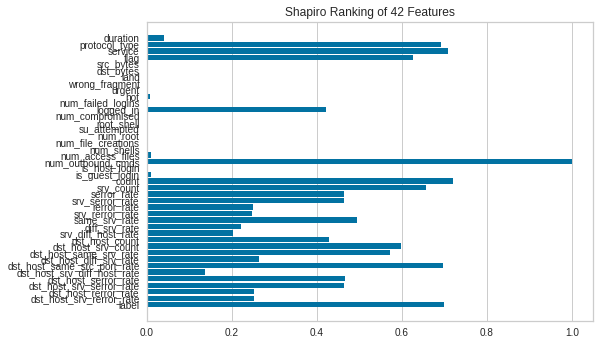

In [0]:
visualizer = Rank1D(features=col_names, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


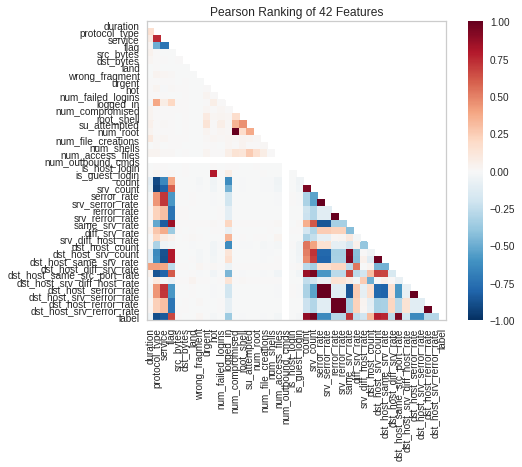

In [0]:
visualizer = Rank2D(features=col_names, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

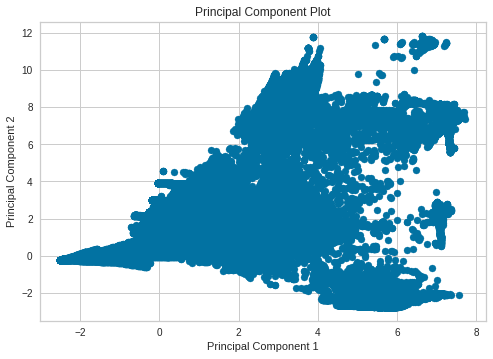

In [0]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()


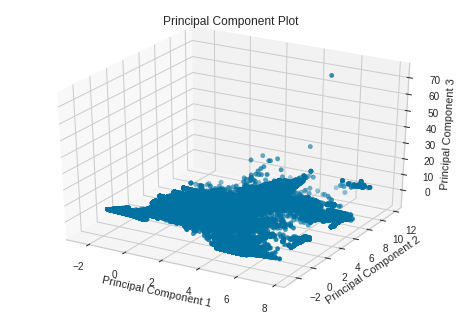

In [0]:
visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32939e-19): result may not be accurate.
  overwrite_a=True).T


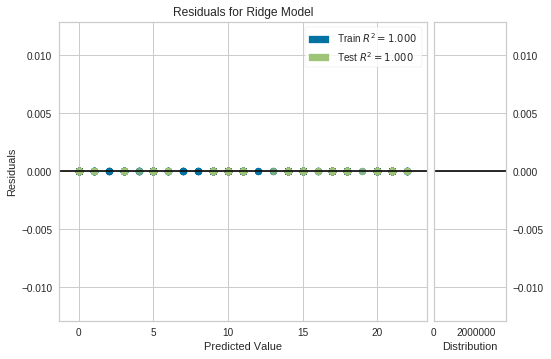

In [0]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()            

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix

In [0]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [0]:
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print(clf.feature_importances_)

[0.00064631 0.04983422 0.04911098 0.09381596 0.10016069 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06373404 0.
 0.         0.         0.         0.         0.17881472 0.08713329
 0.         0.         0.04990594 0.         0.05107981 0.10929396
 0.         0.         0.         0.         0.         0.16647009]


In [0]:

data['label'].value_counts()

18    2807886
9     1072017
11     972781
17      15892
5       12481
15      10413
10       2316
0        2203
21       1020
20        979
14        264
3          53
1          30
6          21
22         20
4          12
16         10
7           9
2           8
8           7
13          4
12          3
19          2
Name: label, dtype: int64

In [0]:

labels = data['label'].copy()
labels[labels!='normal'] = 'anomaly'
labels.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


anomaly    4898431
Name: label, dtype: int64

In [0]:
import pandas as pd
test_data = pd.read_csv("kddcup.testdata.unlabeled.gz", header=None, names = col_names)
test_data['label'].value_counts()

Series([], Name: label, dtype: int64)

In [0]:
num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
scaler = MinMaxScaler()

features = df[num_features].astype(float)
features[num_features] = scaler.fit_transform(features[num_features])

In [0]:
df2=test_data
df2.protocol_type = preprocessing.LabelEncoder().fit_transform(df2["protocol_type"])
df2.service = preprocessing.LabelEncoder().fit_transform(df2["service"])
df2.flag = preprocessing.LabelEncoder().fit_transform(df2["flag"])
df2.label = preprocessing.LabelEncoder().fit_transform(df2["label"])

In [0]:
df2[num_features] = df2[num_features].astype(float)
df2[num_features]=scaler.fit_transform(df2[num_features])
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.003922,0.003922,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
1,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989427
2,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989428
3,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989429
4,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1989430
5,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1989431
6,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989432
7,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.992157,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1989433
8,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.992157,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1989434
9,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989435


In [0]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.003922,0.003922,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
1,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989427
2,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989428
3,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989429
4,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1989430
5,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1989431
6,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989432
7,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.992157,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1989433
8,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.992157,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1989434
9,0.0,2,50,9,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1989435


In [0]:
corrected = test_data[num_features].astype(float)
true_labels = test_data['label'].copy()
true_labels[true_labels!='normal.'] = 'anomaly'

corrected

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.003922,0.003922,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.992157,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.992157,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000002,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.996078,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.cluster import KMeans
k = 60
km = KMeans(n_clusters = k)

t0 = time()
km.fit(features)
tt = time()-t0
print("Clustered in {} seconds".format(round(tt,3)))

##################################################
##### Get labels for each cluster formed
##################################################

# labels = kdd_data_10percent['label']
label_names = list(map(
    lambda x: pd.Series([labels[i] for i in range(len(km.labels_)) if km.labels_[i]==x]), 
    range(k)))


# for i in range(k):
#     print("Cluster {} labels:".format(i))
#     print(label_names[i].value_counts())
#     print()


##################################################
##### Get one label for each cluster based on max frequency
##################################################

clusters = []
for i in range(len(label_names)):
    clusters.append(label_names[i].value_counts().index.tolist()[0])

Clustered in 1353.402 seconds


In [0]:


#data preprocessing

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the dataset
dataset = pd.read_csv('kddcup.data_10_percent.gz')

#change Multi-class to binary-class
dataset['normal.'] = dataset['normal.'].replace(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.', 'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.', 'neptune.', 'nmap.', 'perl.', 'phf.', 'pod.', 'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.', 'warezclient.', 'warezmaster.'], 'attack')

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 41].values

#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x_1 = LabelEncoder()
labelencoder_x_2 = LabelEncoder()
labelencoder_x_3 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])
x[:, 2] = labelencoder_x_2.fit_transform(x[:, 2])
x[:, 3] = labelencoder_x_3.fit_transform(x[:, 3])
onehotencoder_1 = OneHotEncoder(categorical_features = [1])
x = onehotencoder_1.fit_transform(x).toarray()
onehotencoder_2 = OneHotEncoder(categorical_features = [4])
x = onehotencoder_2.fit_transform(x).toarray()
onehotencoder_3 = OneHotEncoder(categorical_features = [70])
x = onehotencoder_3.fit_transform(x).toarray()
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 60, init = 'uniform', activation = 'relu', input_dim = 118))

#Adding a second hidden layer
classifier.add(Dense(output_dim = 60, init = 'uniform', activation = 'relu'))

#Adding a third hidden layer
classifier.add(Dense(output_dim = 60, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 10, nb_epoch = 20)

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#the performance of the classification model
print("the Accuracy is: "+ str((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])))
recall = cm[1,1]/(cm[0,1]+cm[1,1])
print("Recall is : "+ str(recall))
print("False Positive rate: "+ str(cm[1,0]/(cm[0,0]+cm[1,0])))
precision = cm[1,1]/(cm[1,0]+cm[1,1])
print("Precision is: "+ str(precision))
print("F-measure is: "+ str(2*((precision*recall)/(precision+recall))))
from math import log
print("Entropy is: "+ str(-precision*log(precision)))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data w






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=118, units=60, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=60, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=60, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/20
345814/345814 [==============================] - 56s 161us/step - loss: 0.0065 - acc: 0.9984
Epoch 2/20
345814/345814 [==============================] - 53s 154us/step - loss: 0.0040 - acc: 0.9991
Epoch 3/20
345814/345814 [==============================] - 54s 157us/step - loss: 0.0037 - acc: 0.9993
Epoch 4/20
345814/345814 [==============================] - 53s 155us/step - loss: 0.0037 - acc: 0.9993
Epoch 5/20
345814/345814 [==============================] - 53s 154us/step - loss: 0.0038 - acc: 0.9993
Epoch 6/20
345814/345814 [==============================] - 54s 157us/step - loss: 0.0036 - acc: 0.9994
Epoch 7/20
345814/345814 [==============================] - 54s 157us/step - loss: 0.0037 - acc: 0.9994
Epoch 8/20
345814/345814 [==============================] - 54s 156us/step - loss: 0.0036 - acc: 0.9994
Epoch 9/20
345814/345814 [==============================] - 53s 154us/step - loss: 0.0036 - acc: 0.9994
Epoch 10/20
345814/345814 [==============================] - 53